## Assessment Cover Page

***

### Student Full Name: Ilia Grishkin
### Student Number: 2024139
### Module Title: 
### Assessment Title: 
### Assessment Due Date: 
### Date of Submission:

***

<div style="border: 1px solid black; padding: 10px;">

**Declaration**

By submitting this assessment, I confirm that I have read the CCT policy on academic misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. 
I declare it to be my own work and that all material from third parties has been appropriately referenced.
 I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

***

# Content 
- ### **[Task 1 - Data Analysis](#section0)**
    - **[Introduction](#section1)**
    - **[EDA](#section2)**
    - **[Data preparation](#section3)**
    - **[Visualisation](#section4)**
    - **[PCA](#section41)**
    - **[Multiple linear Regression](#section5)**
    - **[Simple linear Regression](#section6)**
    - **[Decision Tree](#section7)**
    - **[Discrete Probability Analysis](#section71)**
    - **[Continuous Probability Analysis](#section72)**
- ### **[Task 2 - Probability (Discrete)](#section8)**
    - **[Introduction](#section9)**
    - **[Sample space](#section10)**
    - **[Solution 1](#section11)**
    - **[Solution 2](#section12)**
- ### **[Task 3 - Probability (Continuous)](#section13)**
    - **[Introduction](#section14)**
    - **[Scenario 1 (exactly 85 minutes in the Zoo)](#section15)**
    - **[Scenario 2 (less than 85 minutes in the Zoo)](#section16)**
    - **[Scenario 3 (more than 85 minutes in the Zoo)](#section17)**
    - **[Scenario 4 (between 85 and 100 minutes in the Zoo)](#section18)**
    - **[Scenario 5 (Injuries)](#section19)**


<a id="section0"></a>
## Task 1 - Data Analysis
<a id="section1"></a>
### Introduction

#### Research question

In our research will discover which characteristics of laptops affect the final price the most and which prediction accuracy we will get based on given parameters.

#### Data Source
As a data sourse we will use an available for public use dataset "Laptops Price Dataset" published on Kaggle (https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset). Dataset contains 2160 records with 12 features which describe some basic characteristics of modern laptops.

#### EDA
Exploratory Data Analysis (EDA). 
It will help us to understand the structure of the dataset including the size, shape, properties and types of variables. Also identify patterns and relationships between variables. Additionally, EDA allows as to select appropriate techniques and models for our futher alalysis.

#### Machine Learning Models
We are going to apply multiple machine learning model to the dataset in order to underctand which one gives with the highest accuracy. Also we will try to discover advantages and disadvantages of an apply of each model to data the datasets related to property market in Ireland.
1. Multiple linear Regression
2. Linear Regression
3. Decision Tree

<a id="section2"></a>
### EDA

In [40]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree     
from sklearn import metrics                           
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("laptops.csv")

In [6]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.shape

(2160, 12)

In [5]:
df.describe(include="all")

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


- **Count** We can see that the length of all features except 2 (Storage type, GPU and Screen) are even and equal to numbers of records which we gov by .shape method. It says us that there are some missing values.
- **Unique** Shows how many unique values are in the each column. It helps us to understand variety of each column. Overall there are 27 different brands, and 121 models.
- **Top** Shows the nost frequent value in a column.
- **Frequency** indicates how offen the most frequent value appers in a column. For example in a column "Laptop" freq is 1 because each laptop has an unique name. But the "top" in a "Brand" is 415, which means that the brand "Asus" has 415 laptop names.
- **Mean** Avarage value for the sample. Can be calculated bt summing all single values and dividing by number of those values. 
- **Standart deviation** indicates avarage distance for each point to the mean and shows general spread of data. To get this value we need to calculate a distanse bettween each single value and mean. All values in a first and second quartiles will be with minus because their values by default lower than mean, however after we put them in square, we get the net distance from mean in square. After getting the mean from those values we can apply square root to get a standart deviation.
- **Min** shows the lowest value in the column. For example cheapest laptop costs 201.05.
- **25%** Or first quartile. Representd a value ay 1/4 of the sample.
- **50%** Median, which indicates the middle or array. In a perfect distribution mean and median are even, but here the distrebution is right-skewed. It could happen due to some laptops whose price much higher. Those values may be considered as outliers because their values affect or at least add a noise to the analysis and machine learning model.
- **75%** Third quartile. Representd a value ay 3/4 of the sample.
- **Max** shows the highest value in the column. For example the bigest laptop's storage is 4k.

Also we could notice that many cells conain missing value (NaN). It because the summary includes metrix fir both numerical and categorical data. 
For example unique values, top and frequency are not very important for numeric values where numbers indicate any sort of measurements, such as price. More important for analysis is to get a statistics.
And the same for categorical values. Even if categorical are encoded, the numbers do not represent any characteristics. In this case we should focus on unique values, top and frequency.

In [12]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [153]:
df.isnull().sum()

Laptop         0
Status         0
Brand          0
Model          0
CPU            0
RAM            0
Storage        0
Screen         4
Touch          0
Final Price    0
dtype: int64

<a id="section3"></a>
### Data preparation

#### Drop columns with missing values

In [4]:
df.drop(columns=['Storage type'], inplace=True)
df.drop(columns=['GPU'], inplace=True)

There are also 4 missing values in "Screen" feature, we won't drop entire column in this case, just rows which contain missing values.

In [5]:
df.dropna(inplace=True)

#### Encoding categotical features

In [41]:
label_encoder = LabelEncoder()
df_encoded = df

df_encoded['Laptop'] = label_encoder.fit_transform(df['Laptop'])
df_encoded['Status'] = label_encoder.fit_transform(df['Status'])
df_encoded['Brand'] = label_encoder.fit_transform(df['Brand'])
df_encoded['Model'] = label_encoder.fit_transform(df['Model'])
df_encoded['CPU'] = label_encoder.fit_transform(df['CPU'])
df_encoded['Touch'] = label_encoder.fit_transform(df['Touch'])

<a id="section4"></a>
## Visualisation

#### Heatmap

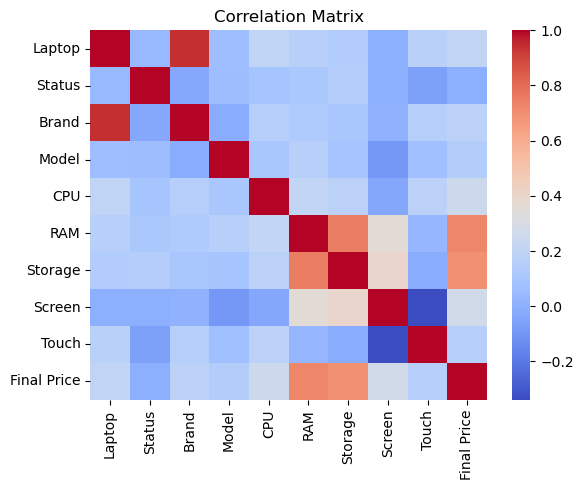

In [86]:
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Price Distribution 

<AxesSubplot:xlabel='Final Price', ylabel='Density'>

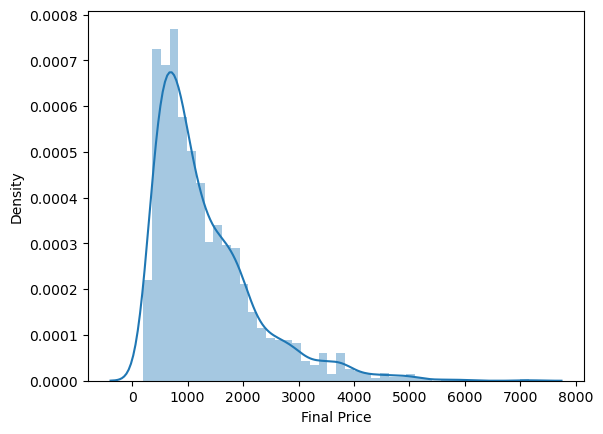

In [19]:
sns.distplot(df['Final Price'])

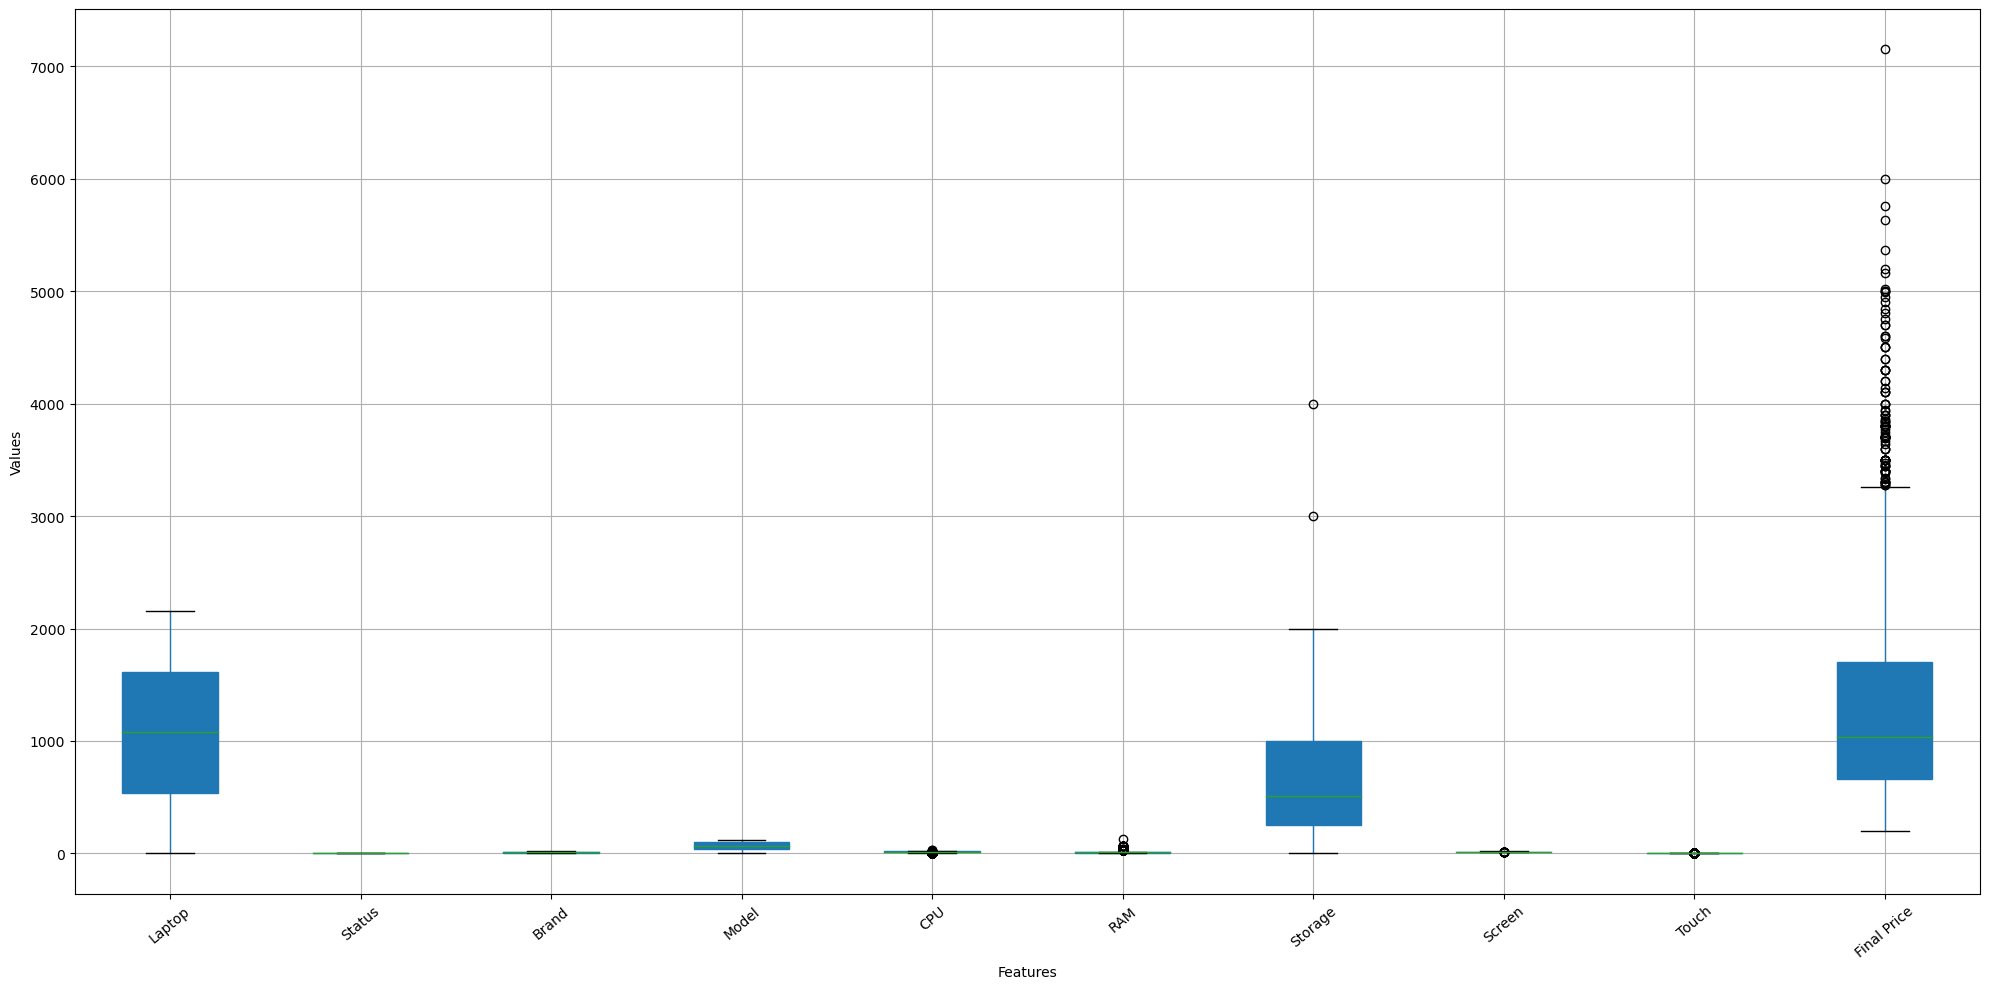

In [30]:
plt.figure(figsize=(20, 10))
boxplot = df_encoded.boxplot(vert=True, patch_artist=True)
plt.xticks(rotation=40)
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout() 
plt.show()

<a id="section41"></a>
## PCA

#### Scale dataset

In [53]:
df_scaled = preprocessing.scale(df_encoded)

In [70]:
pca = PCA()
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)

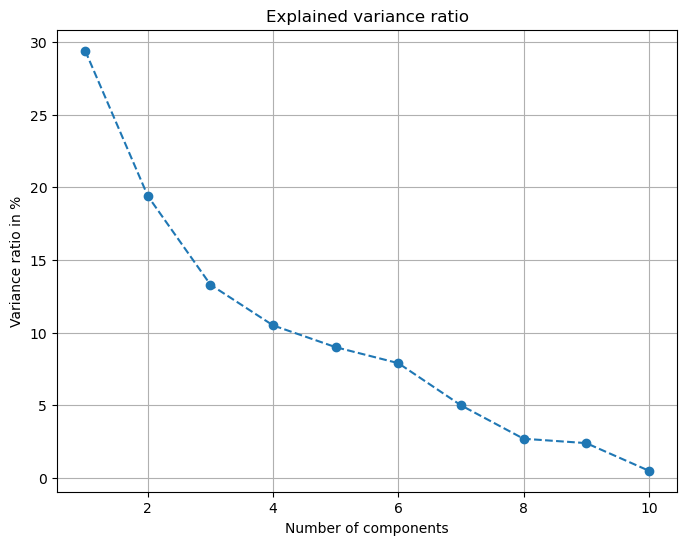

In [71]:
variations = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range (1, len(variations)+1)]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variations) + 1), 
         variations, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio in %')
plt.title('Explained variance ratio')
plt.grid(True)
plt.show()

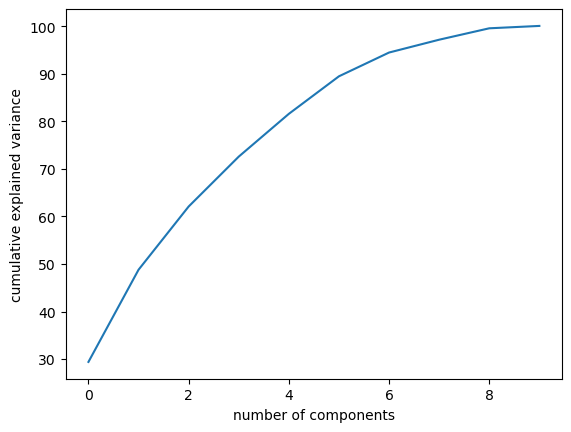

In [72]:
plt.plot(np.cumsum(variations)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [75]:
variance_ratio_percentage = 100
variance_ratio = np.cumsum(variations)
num_components = np.argmax(variance_ratio >= variance_ratio_percentage) + 1
print("Percentage of variance:", variance_ratio_percentage)
print("Number of components:", num_components)

Percentage of variance: 100
Number of components: 10


In [76]:
abs_loadings = np.abs(pca.components_)
importance_scores = np.sum(abs_loadings, axis=0)
variance_ratios = variations

feature_variance = {}
for i, (feature_name, variance_ratio) in enumerate(zip(df.columns, variance_ratios)):
    feature_variance[i, feature_name] = variance_ratio

sorted_feature_variance = dict(sorted(feature_variance.items(), key=lambda item: item[1], reverse=True))

most_important_features = list(sorted_feature_variance.items())[:num_components]

for (index, feature), variance_ratio in most_important_features:
    print(f"Index: {index}, Feature: {feature}, Variance Ratio: {variance_ratio:.1f}%")

Index: 0, Feature: Laptop, Variance Ratio: 29.4%
Index: 1, Feature: Status, Variance Ratio: 19.4%
Index: 2, Feature: Brand, Variance Ratio: 13.3%
Index: 3, Feature: Model, Variance Ratio: 10.5%
Index: 4, Feature: CPU, Variance Ratio: 9.0%
Index: 5, Feature: RAM, Variance Ratio: 7.9%
Index: 6, Feature: Storage, Variance Ratio: 5.0%
Index: 7, Feature: Screen, Variance Ratio: 2.7%
Index: 8, Feature: Touch, Variance Ratio: 2.4%
Index: 9, Feature: Final Price, Variance Ratio: 0.5%


<a id="section5"></a>
## Multiple liniar regression

In [178]:
df_encoded.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Screen,Touch,Final Price
0,39,0,3,42,17,8,512,15.6,0,1009.00
1,486,0,1,54,14,8,256,15.6,0,299.00
2,33,0,3,42,16,8,256,15.6,0,789.00
3,1732,0,14,58,18,16,1000,15.6,0,1199.00
4,941,0,9,4,17,16,512,15.6,0,669.01


Here gives us a prediction based on the values we provided (CPU-18, RAM-16, Storage-512, Screen-15.6)

#### Select features, define variables for model

In [52]:
column_indexes = [4,5,6,7]

X = df_encoded.iloc[:, column_indexes]
y = df_encoded['Final Price']

#### Split data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Train model and print R2 Score

In [54]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#### Evaluate the model

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean2 erorr: {mse}")
print(f"R2: {r2}")

Mean2 erorr: 364829.2444804705
R2: 0.6114234535931532


#### Cross validation, results test and avarage

In [56]:
cv_scores = cross_val_score(model, X, y, cv=5)

print("r2_score per test:", cv_scores)

mean_r2_score = cv_scores.mean()
print("Avarage r2_score:", mean_r2_score)

r2_score per test: [0.65636773 0.64999732 0.63569621 0.36717608 0.45796809]
Avarage r2_score: 0.553441084310794


#### Test prediction
**Here our model gives us a prediction (price) based on the values we provided (CPU-18, RAM-16, Storage-512, Screen-15.6)**

In [57]:
model.predict([[18, 16, 512, 15.6]])

array([1285.81584367])

<a id="section6"></a>
## Simple liniar regression

#### Define variables 

In [58]:
y = df_encoded['Final Price']
X = df_encoded.RAM

#### Check and change type

In [59]:
X = np.array(X)
y = np.array(y)

In [60]:
type(y)

numpy.ndarray

In [61]:
type(X)

numpy.ndarray

#### Check and change shape

In [62]:
print(X.shape,y.shape)

(2156,) (2156,)


In [63]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

#### Split data, create a model

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
liniar_model = LinearRegression()

#### Train the model

In [65]:
liniar_model.fit(X_train, y_train)
y_pred = liniar_model.predict(X_test)

#### Evaluate the model

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {mean_r2_score}")

Mean Squared Error: 426259.0487624277
R-squared: 0.553441084310794


#### Cross validation and avarage R2 Score

In [67]:
cv_scores = cross_val_score(model, X, y, cv=5)

print("r2_score per test:", cv_scores)

mean_r2_score = cv_scores.mean()
print("Avarage r2_score:", mean_r2_score)

r2_score per test: [0.56652518 0.56558038 0.57702297 0.34475046 0.45771742]
Avarage r2_score: 0.5023192837763759


#### Plot result

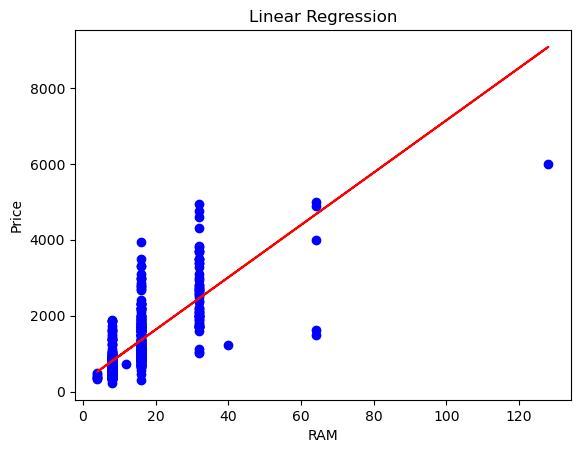

In [68]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

<a id="section7"></a>
## Decision Tree

#### Feature selection

In [69]:
selected_columns = ['Status', 'Brand', 'CPU', 'RAM', 'Screen', 'Touch']
X = df_encoded[selected_columns]
y = df_encoded['Final Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [71]:
model_tree2 = DecisionTreeRegressor(max_depth = 5, random_state = 42)

model_tree2.fit(X_train, y_train)

y_pred = model_tree2.predict(X_test)

print("R-squared:", mean_r2_score)

R-squared: 0.5023192837763759


In [72]:
X.columns.tolist()

['Status', 'Brand', 'CPU', 'RAM', 'Screen', 'Touch']

In [73]:
df_encoded['Final Price'].unique()

array([1009.  ,  299.  ,  789.  , ..., 2699.99, 1899.99, 1699.99])

#### Visualisation Tree

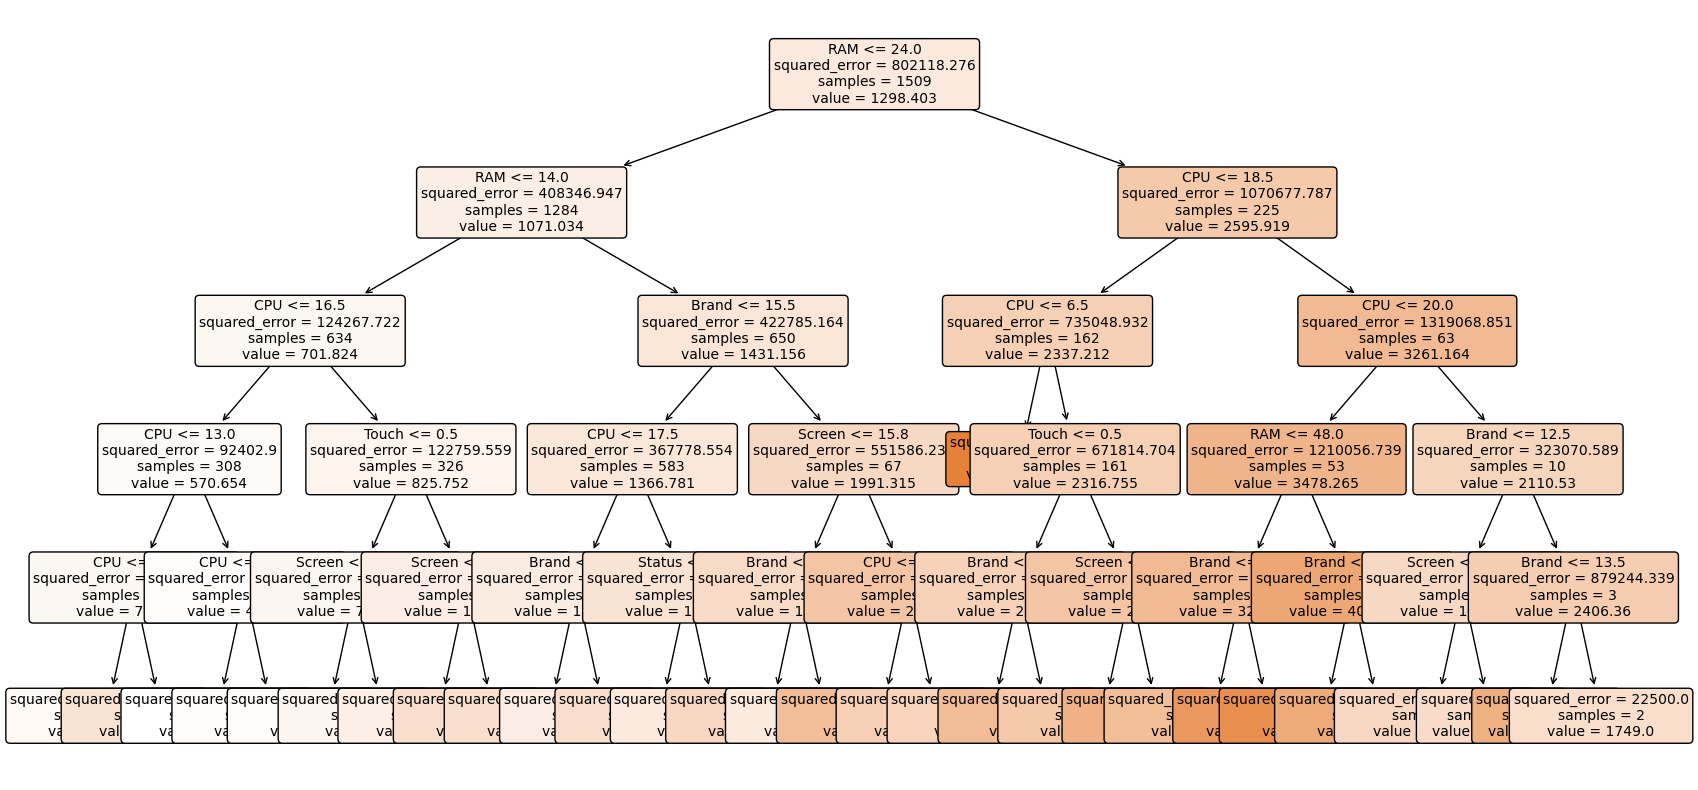

In [74]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree2, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in df_encoded['Final Price'].unique()], rounded=True, fontsize=10)
plt.show()

#### Test prediction

In [203]:
model_tree2.predict([[0,14, 18, 16, 15.6, 0]])

array([1685.69010471])

<a id="section71"></a>
### Discrete Probability Analysis

#### Probability of Laptop Brands

To count probality for each brand we just simply have to count how many times each brand is mentioned in the dataset. After we need divide this number to general number of records. From the result below we can conclude considering that data contains all models of laptops presented on the market or at least the most. Asus produces 19.2 % of whole variety of laptop.

In [18]:
brands = df['Brand'].value_counts(normalize=True)
print("\nProbability of Laptop Brands:")
print(brands)


Probability of Laptop Brands:
Asus                0.192486
HP                  0.170223
Lenovo              0.168831
MSI                 0.142857
Acer                0.063080
Apple               0.053803
Dell                0.038961
Microsoft           0.035714
Gigabyte            0.022263
Razer               0.017161
Medion              0.014842
LG                  0.014842
Alurin              0.013451
PcCom               0.011132
Samsung             0.010204
Dynabook Toshiba    0.008813
Vant                0.005102
Primux              0.003711
Deep Gaming         0.003711
Innjoo              0.002783
Thomson             0.001855
Prixton             0.001391
Millenium           0.000928
Denver              0.000464
Jetwing             0.000464
Realme              0.000464
Toshiba             0.000464
Name: Brand, dtype: float64


#### Probability of Laptop Models

In [37]:
brands = df['Model'].value_counts(normalize=True)
print("\nProbability of Laptop Brands:")
print(brands)


Probability of Laptop Brands:
15S            0.053340
IdeaPad        0.047774
ROG            0.046846
VivoBook       0.045918
ThinkPad       0.045455
                 ...   
100w           0.000464
Electronics    0.000464
Cyborg         0.000464
14S            0.000464
GL75           0.000464
Name: Model, Length: 121, dtype: float64


<a id="section72"></a>
### Continuous Probability Analysis

#### Probability of Price Ranges

Let's calculate a probability of prices. We will create 500 intervals and calculate probability for each.

In [34]:
price_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, 2500), (2500, 3000), (3000, 3500), (3500, 7000)]
for price_range in price_ranges:
    range_count = df[df['Final Price'].between(price_range[0], price_range[1])].shape[0]
    probability = range_count / df.shape[0]
    print(f"\nProbability that price between {price_range[0]} and {price_range[1]}: {probability}")


Probability that price between 0 and 500: 0.14285714285714285

Probability that price between 500 and 1000: 0.3450834879406308

Probability that price between 1000 and 1500: 0.19666048237476808

Probability that price between 1500 and 2000: 0.14935064935064934

Probability that price between 2000 and 2500: 0.06447124304267161

Probability that price between 2500 and 3000: 0.045454545454545456

Probability that price between 3000 and 3500: 0.022727272727272728

Probability that price between 3500 and 7000: 0.03432282003710575


#### Distribution of Final Price

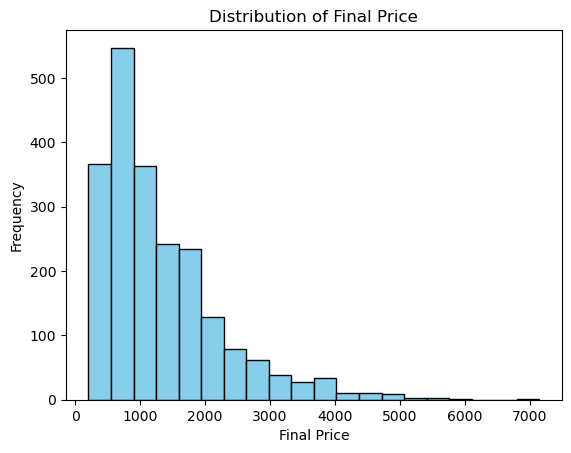

In [28]:
plt.hist(df['Final Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

#### Correlation with Other Features

Also we can take a look at the features which make the biggest impact into a final price.

In [35]:
correlation = df.corr()['Final Price']
print("\nCorrelation with Final Price:")
print(correlation)


Correlation with Final Price:
RAM            0.725196
Storage        0.696154
Screen         0.268359
Final Price    1.000000
Name: Final Price, dtype: float64


<a id="section8"></a>
## Task 2 - Probability (Discrete)


<a id="section9"></a>
### Introduction

For calculating a probability for the given event:

**What is the probability of rolling exactly two 6s in five rolls of a fair die?**

We will use the binomial probability formula.
However, before filling the formula we will try to explain and find each element.

$$ P(X = k) = \binom{n}{k} \times p^k \times (1-p)^{n-k} $$
***
**<center> $$ n $$ number of trials  </center>**
***
**<center> $$ k $$ number of successful outcomes  </center>**
***
**<center> $$ p $$ probability of success on each trial  </center>**
***
**<center> $$ \binom{n}{k} $$ (binomial coefficient) number of ways to choose k successes out of n trials  </center>**


<a id="section10"></a>
### Sample space

First of all, we will define our sample space which includes all possible outcomes and equals 1 or 100%.
We can calculate several possible outcomes by putting 6 in power of 5 because each die with 6 dots is represented in 5 dimensions. We get 7776 possible combinations for five dies. For clarity let's make a simple table.

|  Outcome number |die 1|die 2|die 3|die 4|die 5|
|---|---|---|---|---|---|
|**1**|1|1|1|1|1|
|**2**|1|1|1|1|2|
|**3**|1|1|1|1|3|
|**4**|1|1|1|1|4|
|**5**|1|1|1|1|5|
|**6**|1|1|1|1|6|
|**7**|1|1|1|2|1|
|...|...|...|...|...|...|
|**7776**|6|6|6|6|6|

So, we can see that the probability of each combination equals (1/7776)=0.00012 or 0.012%. In other words, if we roll the die 5 times the liklyhood of getting an exact combination (in order) is 0.012%. The probability for each combination in this case will be the same because each outcome in a specific order takes only one row in sample space and a "piece" of probability which belongs to that row.
However, if the order does not matter to us, we can calculate how many times the combination occurs in the sample space. For example combination (1, 2, 3, 4, 5, 6) has 720 possible variations(6 factorial). In other words, the combination (1,2,3,4,5,6) occurs in our sample space with 720 different variations. And if we know that one variation has a probability of 0.00012 we can calculate the probability (0.00012 * 720 = 0.086 or 8.6%).

<a id="section11"></a>
### Solution 1

Regarding the task of getting 2 same 6s among 5 dies with 6 dots each.
For this calculation, we need to divide our sample space into two parts (separately 2 and 3 dies). 

**<center> Two dies sample space  </center>**

|  Outcome number |die 1|die 2|
|---|---|---|
|**1**|1|1|
|**2**|1|2|
|**3**|1|3|
|**4**|1|4|
|**5**|1|5|
|**6**|1|6|
|**7**|2|1|
|...|...|...|
|**36**|6|6|

For this sample space, we have only 1 row out of 36 which responds to our requirements of getting two 6s. So probability equals 1/36.

Secondly, we need to find the probability that we will get any three numbers on the other dies except number 6.
To do this we will create a sample space for 3 dies with 6 dots where the number of variations equals (6 in power of 3 = 216). However, we need to exclude from this sample space all combinations where '6' occurs. To do that we will just form another sample space for 3 dies with 5 dots, which equals (5 in power of 3 = 125). 
So, now we know that in sample space where 3 dies have 6 dots 216 possible combinations (125 of them any numbers without number 6, and 91 combinations where at least one number 6). Consequently, the probability of getting any number except 6 rolling 3 dies is 125/216.

**<center> Three dies (with 6s) and (without 6s) sample spaces  </center>**

|  Outcome number |die 3|die 4|die 5| |  Outcome number |die 3|die 4|die 5|
|---|---|---|---| |---|---|---|---|
|**1**|1|1|1| |**1**|1|1|1|
|**2**|1|1|2| |**2**|1|1|2|
|**3**|1|1|3| |**3**|1|1|3|
|**4**|1|1|4| |**4**|1|1|4|
|**5**|1|1|5| |**5**|1|1|5|
|**6**|1|1|6| |**6**|1|2|1|
|**7**|1|2|1| |**7**|1|2|2|
|...|...|...|...| |...|...|...|...|
|**216**|6|6|6| |**125**|5|5|5|

In this stage we found out all element of the formula exept binomial coefficient.

$$ P(X = 2) =\binom{n}{k} * \frac{1}{36} * \frac{125}{216} $$

In order to find a binomial coefficient we need complete following formula

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$


$$ \binom{n}{k} = \frac{5!}{2!(5-2)!} = \frac{120}{12} = 10 $$

Now we have all part of the formula and we can calculate probability

$$ P(X = 2) = 10 * \frac{1}{36} * \frac{125}{216} = \frac{10}{36} * \frac{125}{216} = \frac{1250}{7776}$$

Given value (1250/7776) represents the number of records which respond to our condition (exactly two 6s and 3 any numbers except 6s) in the general sample space. The probability equals **0.1607 or 16%**

<a id="section12"></a>
### Solution 2

We also can calculate the probability using python language.
Firstly we need to create a sample space by listing all possible combinations for 5 dies, as it has been done in beginning but in short version.
- Import pandas for store data
- create a list with digits (possible outcomes for each die)
- create an empty list for combinations.
- apply a loop for each die which runs through the list(n) 
- set the same loop within the previos loop, repeat for each die.
- create a variable (combination) with will store values from the each loop.
- add current combination by function append to the list (sample_space) created before
- store sample space as a dataframe using pandas

In [73]:
import pandas as pd

n = [1, 2, 3, 4, 5, 6]

sample_space = []

for die1 in n:
    for die2 in n:
        for die3 in n:
            for die4 in n:
                for die5 in n:
                    combination = (die1, die2, die3, die4, die5)
                    sample_space.append(combination)

df = pd.DataFrame(sample_space, columns=['die_1', 'die_2', 'die_3', 'die_4', 'die_5'])

df.shape

(7776, 5)

As we can see a dataframe was created and it looks exactly as we wanted.
Now we need to calculate number of records where "6" is written only two times.

In [72]:
P_X2 = ((df == 6).sum(axis=1) == 2).sum()

print("Number of rows only with two 6s ->", P_X2)

Number of rows only with two 6s -> 1250


As we can see we have the same result.

***

<a id="section13"></a>
## Task 3 - Probability (Continuous)

<a id="section14"></a>
### Introduction


For calculation the probability of some specific scenario we will use the probability mass function of the Poisson distribution:

$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Usind modifications of this formula and including value 1 as a general probability we can calculate a probability for different events, such as:
1. Probability that random visitor will spend exactly 85 minutes in the Zoo
2. Probability that random visitor will spend less than 85 minutes in the Zoo
3. Probability that random visitor will spend more than 85 minutes in the Zoo 
4. Probability that random visitor will spend between 85 and 100 minutes in the Zoo

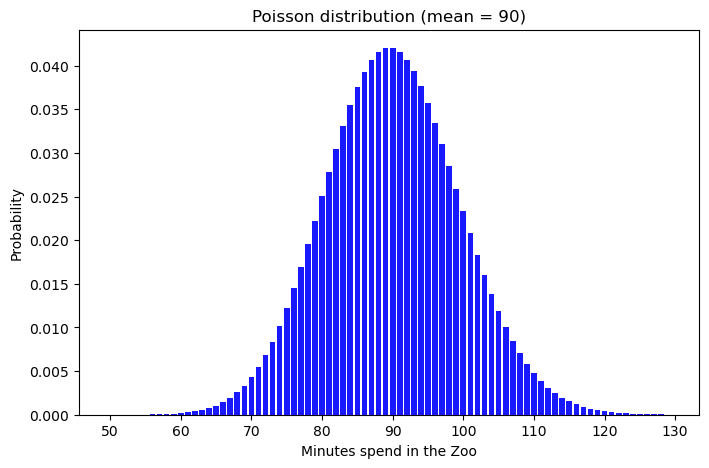

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

mean = 90
x = np.arange(50, 130)

dist = poisson.pmf(x, mean)

plt.figure(figsize=(8, 5))
plt.bar(x, dist, color='blue', alpha=0.9)
plt.xlabel('Minutes spend in the Zoo')
plt.ylabel('Probability')
plt.title('Poisson distribution (mean = 90)')

plt.show()

This chart perfectly illustrates how probability is spread. Each bar represents a number of minute when a visitor left the Zoo. The total length of all bars equals 1 or 100%. Using the probability mass function we can calculate the "length" (propbability) for any bar. 

***

<a id="section15"></a>
### Scenario 1 (exactly 85 minutes in the Zoo)

The probability mass function of the Poisson distribution calculates exact probabality for selected segment of the whole distrebution, in other words, the length of specific bar.


$$ P(X = 85) = \frac{2.71828^{-90} 90^{85}}{85!} $$

$$ k= target = 85 $$
$$ \lambda = mean = 90 $$
$$ e = log = 2.71828 $$


In [132]:
import math
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)

p = ((e ** -m)*(m ** k))/(f_85)
p_precentage = p*100
print("P(X=85) =", p)
print("Percentage of probability:", p_precentage, "%")

P(X=85) = 0.03752609077450859
Percentage of probability: 3.7526090774508587 %


We can conclude that if mean equals 90 minutes per visit, the propality that random visitor will spend exactly 85 minutes equals 3.7%.

***

<a id="section16"></a>
### Scenario 2 (less than 85 minutes in the Zoo)

Basically, to understand how likely a random visitor will spend in the zoo at least 85 minutes we need to count the probability of each condition from 0 minutes to 85 and sum all results. In this case, the propability of this scenario equals 0.322 or 32.2%. We will slightly adapt our formula to get accumulative value. In Python code, we will apply a loop function for k in the range (0, 86) where each result will be added to the total.

$$ P(X < 85) = P(X = 0) + P(X = 1) + P(X = 2)+ P(X = 3)+ P(X = 4) + ... + P(X = 85)$$



$$ P(X < k) = \frac{e^{-\lambda} \lambda^k}{k!} = e^{-\lambda} \left[\frac{{\lambda^k}}{k!}\right] = e^{-90} \left[\frac{{90^0}}{0!} + \frac{{90^1}}{1!} + \frac{{90^2}}{2!} + \frac{{90^3}}{3!} + \frac{{90^4}}{4!} + ... + \frac{{90^{85}}}{85!}\right]$$

$$ k= 85 $$
$$ \lambda = 90 $$
$$ e = 2.71828 $$

In [42]:
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(86):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.3225491811987719


***

<a id="section17"></a>
### Scenario 3 (more than 85 minutes in the Zoo)

The issue with continuous probability may be that it usually has a beginning but no defined end. Theoretically, the random visitor can spend a million hours in a zoo. So, it makes us unable to calculate the probability of a scenario when a visitor spends more than 85 minutes in the zoo. However, to sort this we will just take away the value when it is less than 85 minutes from 1 or 100%. In this case, using the value from the previous case we can conclude that the probability that visitors will spend more than 85 minutes equals 0.678 or 67,8 %.

$$ P(X > k) = 1 - P(X < k)$$
$$ P(X < 85) = 0.322 $$
$$ P(X > k) = 1 - 0.322 = 0.678$$

<a id="section18"></a>
### Scenario 4 (between 85 and 100 minutes in the Zoo)

If we want to find a probability for the scenario when the visitor spends a minimum of 85 minutes and a maximum of 100 minutes we need to find two accumulative values for 100 minutes and 85 minutes and after taking away the  85 from 100. Or sum up all values between 85 and 100.

$$ P(X > k < Y) = P(X > k) - P(X < k)$$

In [49]:
k = 85
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(86):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.3225491811987719


In [50]:
k = 100
e = 2.71828
m = 90
f_85 = math.factorial(k)
total_p = 0

for k in range(101):
    f_k = math.factorial(k)
    p = ((e ** -m)*(m ** k)) / f_k
    total_p += p
print(total_p)

0.8651522098820685


We have a probability for k(85)=0.322 and for k(100)=0.865, p=0.865-0.322, p=0.543

We can conlude that probability for scenario when visitor spends between 85 and 100 minutes equals 0.543 or 54.3%

<a id="section19"></a>
### Scenario 5 (Injuries)

Another task we are given is:

**The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability
that in a particular week, there will be no more than two accidents.**

In order to find probability we are going to use the same probability mass function of the Poisson distribution.
As we could notice in the previous case the highest probability belongs to the average value, the further from the mean the lower the probability. In a previous case the mean equals 90, so the probability that random visitors will spend exactly 90 minutes is 4,2% which is the highest for that sample, 91 minutes = 4.1%, 90 minutes = 4%. So, the further the mean we pick a specific event the lower the probability that the event will take place.

Let's make a Poisson distribution chart to see how probability is spread.

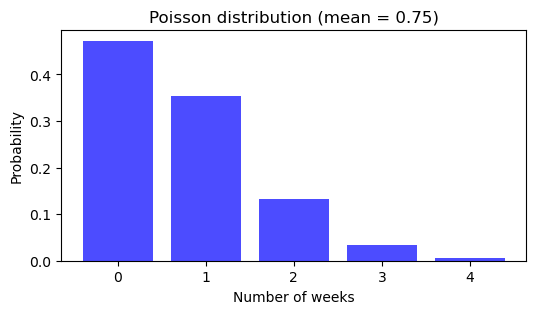

In [104]:

mean = 0.75
x = np.arange(0, 5)

dist = poisson.pmf(x, mean)

plt.figure(figsize=(6, 3))
plt.bar(x, dist, color='blue', alpha=0.7)
plt.xlabel('Number of weeks')
plt.ylabel('Probability')
plt.title('Poisson distribution (mean = 0.75)')

plt.show()



In [113]:
import math
k = 2
e = 2.71828
m = 0.75
f_85 = math.factorial(k)

p = ((e ** -m)*(m ** k))/(f_85)
p_precentage = p*100
print("P(X=2) =", p)
print("Percentage of probability:", p_precentage, "%")

P(X=2) = 0.13285315998142286
Percentage of probability: 13.285315998142286 %


We can conclude the probability that 2 injuries will occur within a week equals 0.13 or 13%.

***

### Author: Ilia Grishkin
#### https://github.com/Ilia-Grishkin/Statistical_Techniques
### <center>Change log</center>

|  Date | Change Description | Changed By  |  Status |
|---|---|---|---|
| 22.03.2024  | Content, structure (titles, subtitles) | Ilia  |  Pushed |
| 25.03.2024  | Task 3 - Probability (Continuous) | Ilia  |  Pushed |
| 26.03.2024  | Task 2 - Probability (Discrete) part 1 (dies) | Ilia  |  Pushed |
| 27.03.2024  | Task 3 - Injuries, grammar check task 2,3 | Ilia  |  Pushed |
| 29.03.2024  | Task 1 - Intro, methods | Ilia  |  Pushed |
| 30.03.2024  | Task 1 - Liniar models | Ilia  |  Pushed |
| 30.03.2024  | Apply probability to the analysis case (laptops) | Ilia  |  Pushed |